# Star Wars survey

While waiting for Star Wars: The Force Awakens to come out, the team at [FiveThirtyEight](https://abcnews.go.com/538) became interested in answering some questions about Star Wars fans. 

In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which we can download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding. 


In [2]:
star_wars.head() # Quick scanning

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


**There are several columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.**

In [3]:
print(star_wars.columns) # Check the column names

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data has several columns, including the following:

* RespondentID — An anonymized ID for the respondent (person taking the survey)
* Gender — the respondent's gender
* Age — the respondent's age
* Household Income — the respondent's income
* Education — the respondent's education level
* Location (Census Region) — the respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

# Cleaning and Mapping Yes/No Columns

The columns *Have you seen any of the 6 films in the Star Wars franchise?* and *Do you consider yourself to be a fan of the Star Wars film franchise?* are currently string types, because the main values they contain are Yes and No. We want to make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. 

In [4]:
yes_no = {'Yes': True, 'No':False} # create a dictionary
# We use the map method to perform the conversion.
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no) 
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].head() # Check the updated column

0     True
1    False
2     True
3     True
4     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].head() # Check the updated column

0     True
1      NaN
2    False
3     True
4     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

# Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question: Which of the following Star Wars films have you seen? Please select all that apply.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie. We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [7]:
selected_columns = star_wars.columns[3:9] # Create the list with the name of the columns we want to work with.

column_modify_dict={'Star Wars: Episode I  The Phantom Menace':True,'Star Wars: Episode II  Attack of the Clones':True,'Star Wars: Episode III  Revenge of the Sith':True,'Star Wars: Episode IV  A New Hope':True,'Star Wars: Episode V The Empire Strikes Back':True,'Star Wars: Episode VI Return of the Jedi':True,np.NaN:False} 
# Create the dictionary to map the values of the previous selectred columns which we want to modify.

for column in selected_columns:
    star_wars[column] = star_wars[column].map(column_modify_dict)

# map only works for series, so we will modify column by column in the dataframe using a for loop.


In [26]:
print(selected_columns)
name_col_dict_modify={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1','Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}
# Create a dictionary to use it for modifying the names of the selected columns.

star_wars = star_wars.rename(columns=name_col_dict_modify)

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [28]:
star_wars.head() # Check the updated column names 

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning the Ranking Columns


The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [29]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# Select a subset of columns from the DataFrame star_wars and then convert those values into float type.

In [30]:
name_col_dict_modify_2={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1','Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3','Unnamed: 12':'ranking_4','Unnamed: 13':'ranking_5','Unnamed: 14':'ranking_6'}

star_wars = star_wars.rename(columns=name_col_dict_modify_2) # Use rename method and the previous dictionary to rename the selected columns.

In [31]:
star_wars.head() # Check the updated columns.

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Finding the Highest-Ranked Movie

Now, we will be able to obtain the highest-ranked movie by calculating the mean of each ranking column.

In [13]:
mean_ranking_columns = star_wars[star_wars.columns[9:15]].mean() # Calculate the mean of the selected columns.
print(mean_ranking_columns)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


Text(0.5, 1.0, 'Mean Ranking')

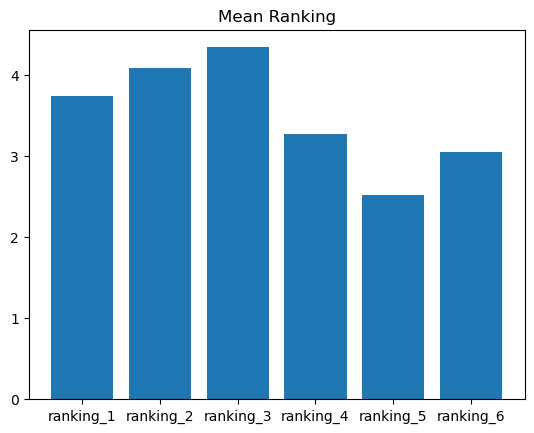

In [58]:
plt.bar(star_wars.columns[9:15],mean_ranking_columns) # Bar plot of the mean of each of the ranking columns
plt.title('Mean Ranking')

Remember that the lower index 1 corresponds to the movie 'Star Wars: Episode **I** The Phantom Menace', the lower index 2 corresponds to the movie 'Star Wars: Episode **II** Attack of the Clones', the lower index 3 to the movie 'Star Wars: Episode **III** Revenge of the Sith', and so on.

ranking_3 corresponds to the film 'Star Wars: Episode III Revenge of the Sith.' Given that a higher value indicates a less favored movie, this entry in the saga would be considered the least favorite.

The top-rated Star Wars movie is associated with ranking_5, which is 'Star Wars: Episode V The Empire Strikes Back.' There appears to be a trend where the older Star Wars movies have higher favorability rankings when compared to the newer ones.

# Finding the Most Viewed Movie #

In [15]:
star_wars[star_wars.columns[3:9]].sum() # We sum the values for each column (True is treated as 1 and False as 0).

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

Text(0.5, 1.0, 'Number of views')

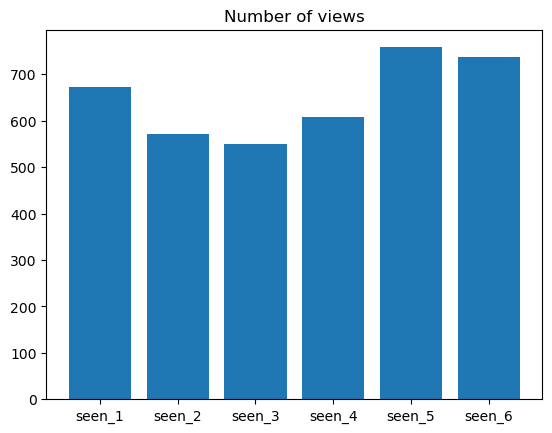

In [57]:
plt.bar(star_wars.columns[3:9],star_wars[star_wars.columns[3:9]].sum()) # Bar plot of the sum of each of the selected columns.
plt.title('Number of views')

It appears that the movies 'Star Wars: Episode V The Empire Strikes Back' and 'Star Wars: Episode VI Return of the Jedi' present the most views. Apparently the older movies have been watched for more people than the newer ones.
This result makes sense with that the older movies have better rankings.



# Analysis based on Gender #

We will repeat the previous analyses for the data correspondent to men and women and for further comparison.

In [50]:
males = star_wars[star_wars['Gender']=='Male'] # Filter the dataframe with the male responses.
females = star_wars[star_wars['Gender']=='Female'] # Filter the dataframe with the female responses.

In [37]:
males.head() # Quick scanning

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [39]:
females.head() # Quick scanning

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
111,3291439708,True,True,True,True,False,False,True,True,1.0,...,Somewhat favorably,Greedo,Yes,No,Yes,Female,> 60,"$50,000 - $99,999",Bachelor degree,South Atlantic
112,3291439404,True,False,True,False,False,False,False,False,1.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,> 60,"$25,000 - $49,999",Graduate degree,Pacific
114,3291435787,True,False,True,False,False,False,True,True,3.0,...,Somewhat favorably,I don't understand this question,No,NaN,No,Female,30-44,"$50,000 - $99,999",Graduate degree,South Atlantic
116,3291433636,True,False,True,True,True,False,True,True,3.0,...,Somewhat unfavorably,I don't understand this question,No,NaN,No,Female,30-44,"$25,000 - $49,999",Bachelor degree,West South Central
117,3291431939,True,True,True,True,True,True,True,True,3.0,...,Very favorably,Han,No,NaN,Yes,Female,30-44,"$25,000 - $49,999",Graduate degree,South Atlantic


# Male and Female Rankings #

In [49]:
# Mean of each of the ranking columns for the male and females data.
males_mean_rank = males[males.columns[9:15]].mean()
females_mean_rank = females[females.columns[9:15]].mean()

Text(0.5, 1.0, 'Mean Ranking: Men')

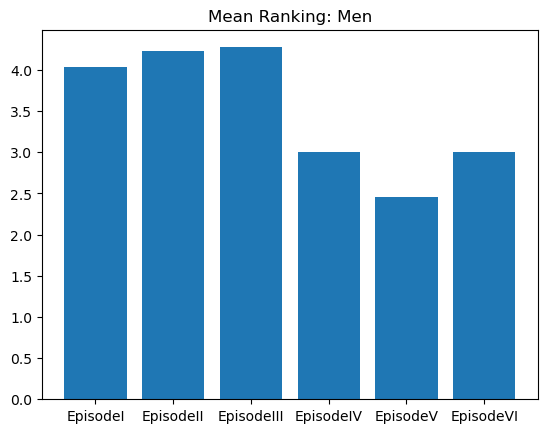

In [54]:
plt.bar(['EpisodeI','EpisodeII','EpisodeIII','EpisodeIV','EpisodeV','EpisodeVI'],males_mean_rank)
plt.title('Mean Ranking: Men')
# Bar plot for the mean ranking of each movie for male data.

Text(0.5, 1.0, 'Mean Ranking: Women')

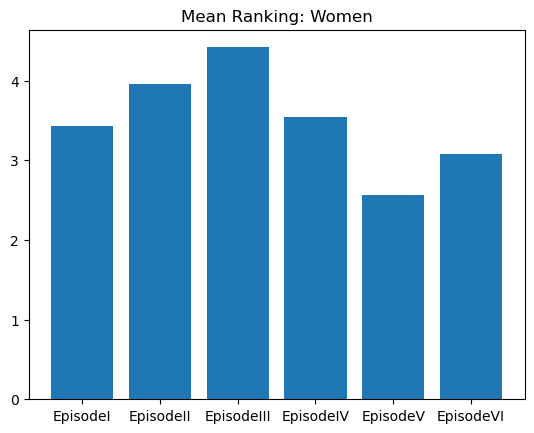

In [55]:
plt.bar(['EpisodeI','EpisodeII','EpisodeIII','EpisodeIV','EpisodeV','EpisodeVI'],females_mean_rank)
plt.title('Mean Ranking: Women')
# Bar plot for the mean ranking of each movie for female data.

The bar plot for the ranking of men and women present a similar shape, but it appears that women tend to rank the two older Star Wars movies higher than men, and lower for one of the newer movies 'Star Wars: Episode IV A New Hope'.

# Male and Female views #

In [56]:
# For the male and female data, we sum the values for each column (True is treated as 1 and False as 0).
males[males.columns[3:9]].sum()
females[females.columns[3:9]].sum()

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

Text(0.5, 1.0, 'Number of views: Men')

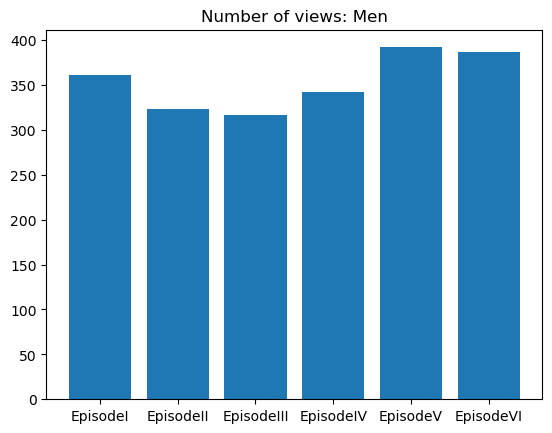

In [52]:
plt.bar(['EpisodeI','EpisodeII','EpisodeIII','EpisodeIV','EpisodeV','EpisodeVI'],males[males.columns[3:9]].sum())
plt.title('Number of views: Men')

Text(0.5, 1.0, 'Number of views: Women')

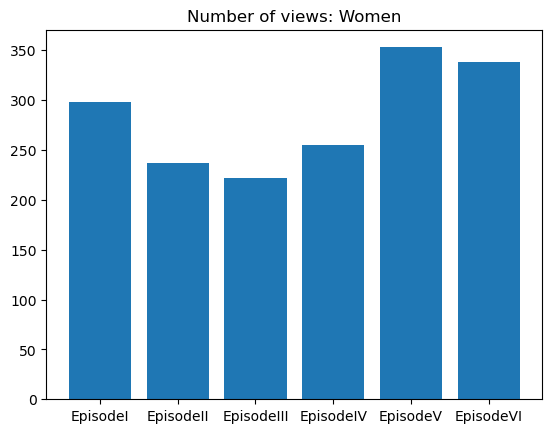

In [53]:
plt.bar(['EpisodeI','EpisodeII','EpisodeIII','EpisodeIV','EpisodeV','EpisodeVI'],females[females.columns[3:9]].sum())
plt.title('Number of views: Women')

Men and women exhibit a similar trend regarding the number of views for the Star Wars movies, with the two newest films having higher viewership.